df = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/predictor_fields/ACCESS-CM2_histupdated.nc')

In [68]:
df = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/predictor_fields/ACCESS-CM2_histupdated.nc')

In [69]:
df

<xarray.Dataset>
Dimensions:    (time: 81668, bnds: 2, lon: 26, lat: 23)
Coordinates:
  * time       (time) object 1959-01-01 12:00:00 ... 2015-01-01 00:00:00
  * lon        (lon) float64 150.6 152.1 153.6 155.1 ... 183.6 185.1 186.6 188.1
  * lat        (lat) float64 -59.38 -57.88 -56.38 ... -29.38 -27.88 -26.38
Dimensions without coordinates: bnds
Data variables: (12/16)
    time_bnds  (time, bnds) object ...
    t_850      (time, lat, lon) float32 ...
    t_500      (time, lat, lon) float32 ...
    t_250      (time, lat, lon) float32 ...
    u_850      (time, lat, lon) float32 ...
    u_500      (time, lat, lon) float32 ...
    ...         ...
    w_850      (time, lat, lon) float32 ...
    w_500      (time, lat, lon) float32 ...
    w_250      (time, lat, lon) float32 ...
    q_850      (time, lat, lon) float32 ...
    q_500      (time, lat, lon) float32 ...
    q_250      (time, lat, lon) float32 ...
Attributes: (12/259)
    CDI:                  Climate Data Interface version 1.9.5 (http://mpimet...
    history:              Thu Jan 11 03:25:36 2024: cdo -L -mergetime -daymea...
    source:               CSIRO conformal-cubic model. Input file: ccam_12km....
    Conventions:          CF-1.7
    title:                CCAM simulation data
    contact:              ccam@csiro.au
    ...                   ...
    ateb_minsnowden:      100.0
    ateb_ncyits:          6
    ateb_nfgits:          3
    ateb_nrefl:           3
    ateb_refheight:       0.6
    ateb_resmeth:         1

In [42]:
import cartopy as cart

In [ ]:
lon
(lon)
float64
150.6 152.1 153.6 ... 186.6 188.1
lat
(lat)
float64
-59.38 -57.88 ... -27.88 -26.38

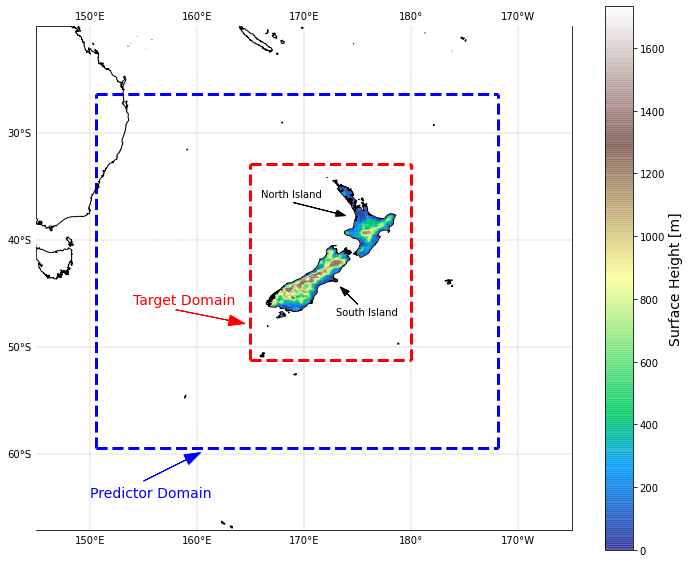

In [148]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from cartopy.io.img_tiles import GoogleTiles
proj = ccrs.PlateCarree(central_longitude=171.77)
# target variables domain
latmin =-51.21
latmax = -32.86
lonmin = 164.9
lonmax = 180.0
# predictor variables domain
latmin_p = -59.38
latmax_p = -26.38
lonmin_p = 150.6
lonmax_p = 188.1

df = xr.open_dataset("/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/ancil_fields/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc")

fig, ax = plt.subplots(1, 1, figsize=(12, 10), subplot_kw={'projection': proj})


#fig.show()


ax.coastlines('10m', zorder =15)
ax.plot([lonmin, lonmax],[latmin, latmin], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw =3)
ax.plot([lonmin, lonmax],[latmax, latmax], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw =3)
ax.plot([lonmin, lonmin],[latmin, latmax], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw=3)
ax.plot([lonmax, lonmax],[latmin, latmax], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw=3)



ax.plot([lonmin_p, lonmax_p],[latmin_p, latmin_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
ax.plot([lonmin_p, lonmax_p],[latmax_p, latmax_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
ax.plot([lonmin_p, lonmin_p],[latmin_p, latmax_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
ax.plot([lonmax_p, lonmax_p],[latmin_p, latmax_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
#add labels for the north and south islands. 
ax.set_extent([145, 195,-65,  -20])
#ax.set_extent([lonmin-5, lonmax+5,latmin-5,  latmax+5])
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=.3, color='black', linestyle=':', draw_labels=True, zorder =15
                  ,xlocs=np.arange(150, 190, 10).tolist() + [-170])
cs = df.orog.plot(ax = ax, cmap ='terrain', zorder =11, transform = ccrs.PlateCarree(), alpha =0.8, add_colorbar =False)
cbar = fig.colorbar(cs)
cbar.set_label('Surface Height [m]', fontsize =14)

ax.add_feature(cart.feature.OCEAN.with_scale('10m'), color ='white', zorder =12, alpha =1, ec ='k')
ax.text(166, -36, 'North Island', transform = ccrs.PlateCarree(), zorder =17)
ax.text(173, -47, 'South Island', transform = ccrs.PlateCarree(), zorder =17)
ax.arrow(169, -36.5,4, -1, zorder =19, transform = ccrs.PlateCarree(), head_width =0.6, color ='k')
ax.arrow(175, -46,-1, 1, zorder =19, transform = ccrs.PlateCarree(), head_width =0.6, color ='k')
ax.arrow(158, -46.5,5, -1, zorder =19, transform = ccrs.PlateCarree(), head_width =1, color ='r')
ax.text(154, -46, 'Target Domain', transform = ccrs.PlateCarree(), zorder =17, color ='r', fontsize =14)
ax.text(150, -64, 'Predictor Domain', transform = ccrs.PlateCarree(), zorder =17, color ='b', fontsize =14)
ax.arrow(155, -62.5,4, 2, zorder =19, transform = ccrs.PlateCarree(), head_width =1, color ='b')
#ax.annotate('', xy=(166, -36), xytext=(173, -47), arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color='black'))

gl.top_labels = True
gl.left_labels = True
fig.show()


In [1]:
import numpy as np

[2.52736634e+01 1.39246853e+01 1.01427214e+01 2.07183647e+00
 4.08035940e-01 1.61343363e+01 5.57780737e-03 1.15665364e+00
 1.90900793e-01 4.54496708e-01]


In [56]:
hist = np.histogram(gamma_values, bins = np.arange(1, 500,5))[0]
hist2 = np.histogram(gamma_values2, bins = np.arange(1, 500,5))[0]

In [58]:
hist = hist/hist.sum()

In [59]:
hist2 = hist2/hist2.sum()

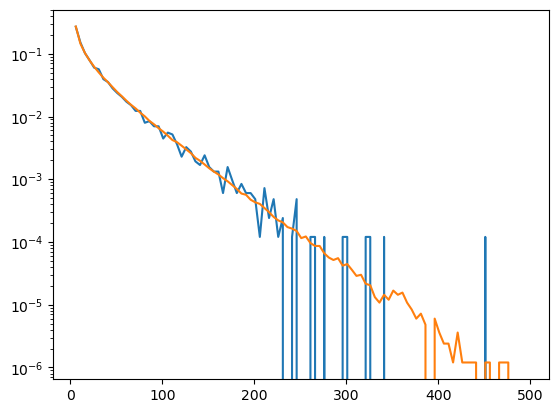

In [62]:
plt.plot(np.arange(1, 500,5)[1:], hist)
plt.plot(np.arange(1, 500,5)[1:], hist2)
plt.yscale('log')

In [145]:
import numpy as np

# Parameters for the Gamma distribution
shape = 0.2   # Example shape parameter (α)
scale = 190.0   # Example scale parameter (β)
scale2 = 65.0  
# Generate 1000 values from the Gamma distribution
gamma_values = np.random.gamma(shape, scale2, 100)
gamma_values2 = np.random.gamma(shape, scale, 1000000)

# Print the first few values
print(gamma_values[:10])


[1.13472341e+01 1.54340484e+01 1.84512480e-01 9.23449055e+00
 2.43263984e+01 2.10071214e-05 4.40520977e-02 1.01482042e-01
 2.47883788e+01 2.83806140e-01]


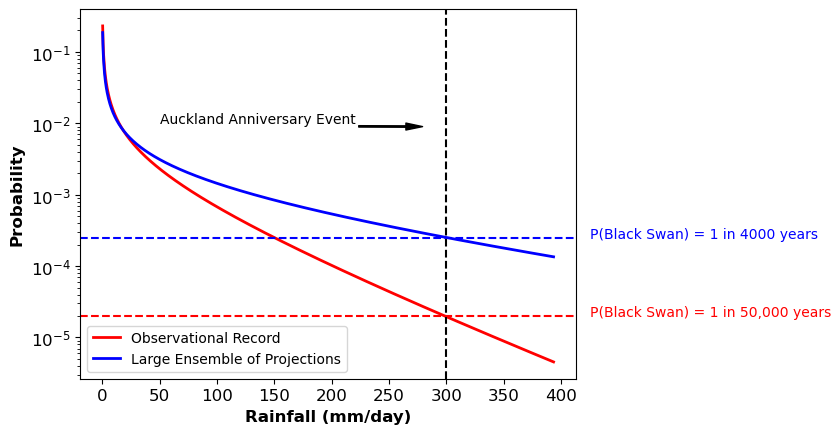

In [190]:
from scipy import stats

# Fit a Gamma distribution to the data
params = stats.gamma.fit(gamma_values, floc=0)  # Fix location parameter to 0
shape_fit, loc_fit, scale_fit = params
x = np.linspace(0, np.max(gamma_values)*2, 1000)
pdf_fitted = stats.gamma.pdf(x, shape_fit, loc_fit, scale_fit)
params = stats.gamma.fit(gamma_values2, floc=0)  # Fix location parameter to 0
shape_fit, loc_fit, scale_fit = params
x = np.linspace(0, np.max(gamma_values)*2, 1000)

pdf_fitted2 = stats.gamma.pdf(x, shape_fit, loc_fit, scale_fit)
x = np.linspace(0, np.max(gamma_values)*2.42, 1000)

plt.plot(x, pdf_fitted, 'r-', lw=2, label='Observational Record')
plt.plot(x, pdf_fitted2, 'b-', lw=2, label='Large Ensemble of Projections')
plt.yscale('log')
plt.axvline(300, color ='k', ls ='--')
#plt.text(100, 1e-8, "Black Swan Event \n  over Auckland")
plt.axhline(2.0e-5, color ='r', ls ='--')
plt.axhline(2.5e-4, color ='b', ls ='--')
plt.text(425,2.5e-4, 'P(Black Swan) = 1 in 4000 years', color ='b')
plt.text(425,2.0e-5, 'P(Black Swan) = 1 in 50,000 years', color ='r')
plt.annotate(
    'Auckland Anniversary Event',
    xy=(280, 0.9e-2),          # Coordinates of the text
    xytext=(50, 1e-2),       # Coordinates of the arrow's tail
    textcoords='data',
    arrowprops=dict(facecolor='black', shrink=0.01, width=1, headwidth=5),
    fontsize=10,
    color='black'
)
plt.legend()
plt.xlabel('Rainfall (mm/day)', weight ='bold', fontsize =12)
plt.ylabel('Probability', weight ='bold', fontsize =12)
plt.tick_params(labelsize=12)
plt.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/Reviewer/test.pdf', bbox_inches ='tight', dpi =300)
#plt.grid('on')

In [169]:
1/(2.0*1e-5)

49999.99999999999

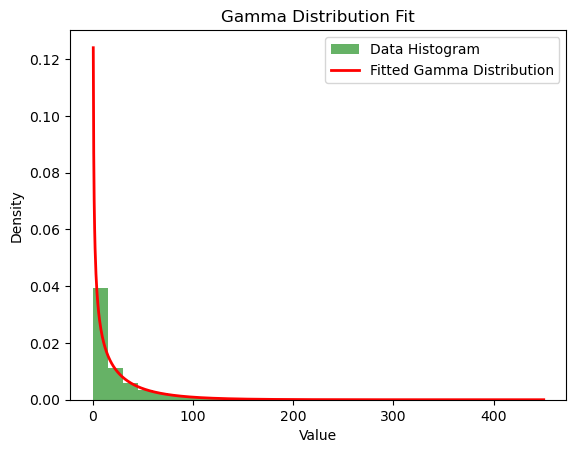

In [67]:
import matplotlib.pyplot as plt

# Create a range of values to plot the fitted distribution


# Plot histogram of the data
plt.hist(gamma_values, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Plot the fitted Gamma distribution
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Fitted Gamma Distribution')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Gamma Distribution Fit')
plt.legend()

# Show the plot
plt.show()


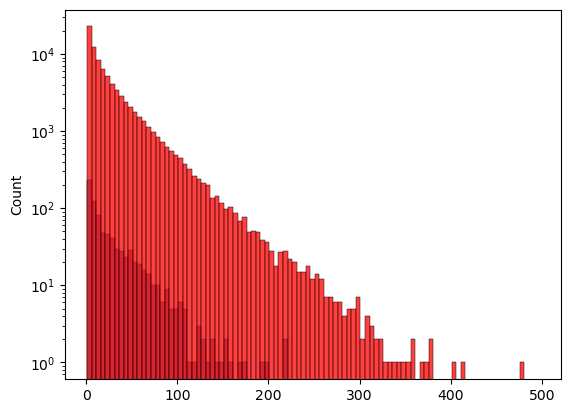

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(gamma_values, bins = np.arange(1, 500,5), common_norm =True)
sns.histplot(gamma_values2, bins = np.arange(1, 500,5), common_norm =True, color ='r')
plt.yscale('log')

In [37]:
ccrs.RotatedPole(l)

cartopy.crs.RotatedPole